#Statistical Techniques for Data Science and Robotics - Assignment 2

## Parth Kalkar - BS19-DS-01

### Code - https://github.com/ParthKalkar/travelling-salesman-simulated-annealing

##Task 1:


###1. What is the conditional distribution of $X$, the number of samples containing Giardia cysts, given $θ$?

If we consider sample containing Giardia cysts as a success then taking n samples with the probability of each one to contain Giardia cysts $θ$ follows Binomial distribution.

$$X|θ {\sim} Binomial(n, θ)$$

$$p(X|n,θ) = {n\choose X} \cdot θ^X {⋅} (1−θ)^{n−X}$$

Given $n=116$, $X=17$ we get likelihood:
$$p(X=17|n=116,θ) = {116\choose 17} \cdot θ^{17} {⋅} (1−θ)^{99}$$




###2. Before the experiment, the NIWA scientists elicited that the expected value of $θ$ is $0.2$ with a standard deviation of $0.16$. Determine the parameters $α$ and $β$ of a Beta prior distribution for $θ$ with this prior mean and standard deviation. (Round $α$ and $β$ to the nearest integer).

The Beta distribution has the following PDF:
$$p(θ|α,β) = \frac{1}{B(α, β)} \cdot θ^{\alpha-1}(1−θ)^{\beta-1}$$
where $B(α, β)$ is a normalizing constant that ensures that the area under the curve sums to one and it is equal to: 

$$B(α, β) = ∫_0^1θ^{\alpha-1}(1−θ)^{\beta-1}dθ$$

Expected value and variance od Beta distribution are derived as following:
$$E[θ]={\frac{α}{α+β}} = 0.2$$
$$Var(θ) = {\frac{α⋅β}{(α+\beta)^2⋅(α+β+1)}} = 0.16^2$$

From first equation we can derive $α$:
$$α=0.2α+0.2β$$
$$0.8α=0.2β$$
$$α=\frac{1}{4}β$$

Substitute $\alpha$ to second equation:
$$\frac{\frac{1}{4}β^2}{\frac{25}{16}\beta^2⋅(\frac{5}{4}\beta+1)}=0.16^2$$

$$\frac{4}{25⋅(\frac{5}{4}\beta+1)}=0.16^2$$

$$4=0.16^2⋅25⋅(\frac{5}{4}\beta+1)$$

$$\frac{5}{4}\beta+1 = \frac{4}{0.16^2\cdot25}$$

$$\beta = (\frac{4}{0.16^2\cdot25} - 1) \cdot \frac{4}{5} = 4.2 ≈ 4$$

$$α=\frac{1}{4} ⋅ 4.2 = 1.05 ≈ 1$$

Beta prior distribution: $θ \sim Beta(1, 4)$

### 3. Find the posterior distribution of θ and summarize it by its posterior mean and standard deviation.

If the likelihood function is binomial then a beta prior distribution gives beta posterior. Therefore, we can say that the posterior will have Beta distribution. 

$$Posterior=\frac{Likelihood⋅Prior}{Marginal\space Likelihood}$$
Using formulas from 1 (Binomial pdf) and 2 (Beta pdf):

$$p(θ|n=116, X=17) = \frac{[{116\choose 17} \cdot θ^{17} {⋅} (1−θ)^{99}][\frac{1}{B(1, 4)} \cdot θ^{0}(1−θ)^{3}]}{p(X=17)}$$

Ignoring constants for now:
$$Posterior ∝ Likelihood⋅Prior$$

$$p(θ|n=116, X=17) ∝ [θ^{17} {⋅} (1−θ)^{99}][θ^{0}(1−θ)^{3}]$$

$$p(θ|n=116, X=17) ∝ θ^{17} {⋅} (1−θ)^{102}$$

$$p(θ|n=116, X=17) ∝ θ^{18-1} {⋅} (1−θ)^{103-1}$$

We got distribution that corresponds to Beta distribution with $α=18, β=103$:

$$p(θ|n=116, X=17) = \frac{1}{B(18, 103)}θ^{17} {⋅} (1−θ)^{102}$$

$$E[θ]={\frac{α}{α+β}} = {\frac{18}{18+103}} = 0.1488$$

$$Var(θ) = {\frac{α⋅β}{(α+\beta)^2⋅(α+β+1)}} = {\frac{18⋅103}{(18+103)^2⋅(18+103+1)}} = 0.00103$$

$$std(θ) = 0.0322$$


### 4. Plot the prior, posterior and normalized likelihood

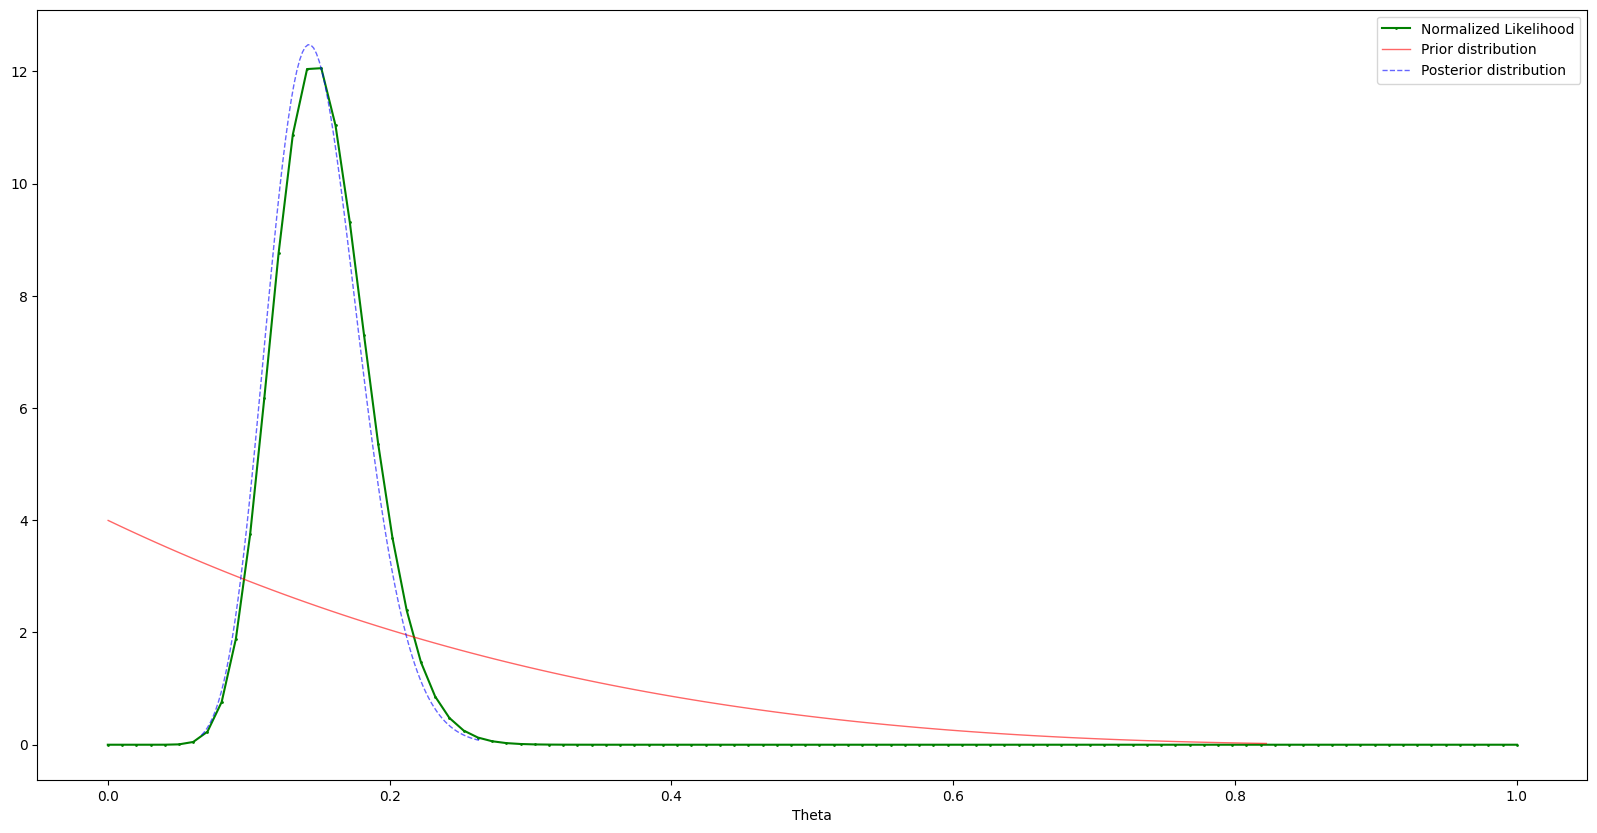

In [26]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from math import factorial

plt.figure(figsize=(20, 10))

# plot likelihood
def binomial(x, n, k):
  return (factorial(n) / (factorial(k) * factorial(n-k))) * x**k * (1-x)**(n-k) 

n, k = 116, 17
x_likelihood = np.linspace(0, 1, 100)
y = binomial(x_likelihood, n, k)
res, err = quad(binomial, 0, 1, args=(n, k))    # normalization coefficient
plt.plot(x_likelihood, y / res, 'go-', ms=1, label='Normalized Likelihood')

# plot prior and posterior
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
a_prior, b_prior = 1, 4
x_prior = np.linspace(beta.ppf(0.001, a_prior, b_prior),
                      beta.ppf(0.999, a_prior, b_prior), 100)
plt.plot(x_prior, beta.pdf(x_prior, a_prior, b_prior),
       'r-', lw=1, alpha=0.6, label='Prior distribution')

a_post, b_post = 18, 103
x_post = np.linspace(beta.ppf(0.001, a_post, b_post),
                beta.ppf(0.999, a_post, b_post), 100)
plt.plot(x_post, beta.pdf(x_post, a_post, b_post),
       'b--', lw=1, alpha=0.6, label='Posterior distribution')

plt.xlabel("Theta")
plt.legend()
plt.show()


### 5. Find the posterior probability that θ < 0.1
The probability is the value at 0.1 of the posterior CDF. We have the CDF of Beta(18, 103):

$$F(x)=\frac{1}{B(18, 103)}*\int_0^x t^{17} * (1-t)^{102}\, dt$$

Therefore, 

$$P(θ<0.1)= F(0.1) = \frac{1}{B(18, 103)}*\int_0^{0.1} t^{17} * (1-t)^{102}\, dt$$ 

As a result, $$P(θ<0.1) \approx  0.0531$$ 

I verified it with CDF of Beta distribution in Scipy:

$$P(θ<0.1|x=17)=0.05309437699304309$$

$$\int x^2 \, dx = \frac{x^3}3 +C$$

In [2]:
betacdf = beta(a_post, b_post).cdf
betacdf(0.1)

0.053094376993042654

### 6. Find a central 95% posterior credible interval for θ

Let $$Q = F^{−1}$$ the inverse CDF. Then, the credible interval is $$[Q(0.025), Q(0.975)]$$

By numerical approximation using Python, the interval is $$[0.0913, 0.2171]$$

[0.09138957252823, 0.21710689824337648]


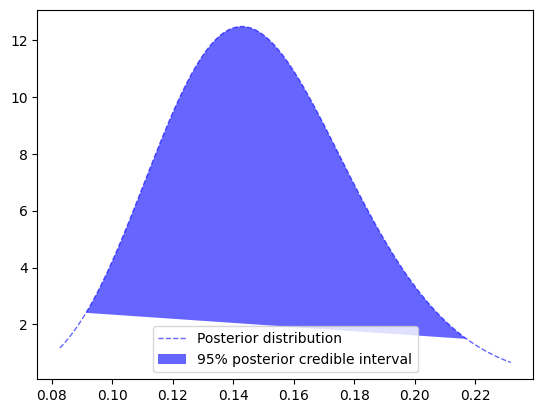

In [3]:
a_post, b_post = 18, 103
x_post = np.linspace(beta.ppf(0.01, a_post, b_post),
                     beta.ppf(0.99, a_post, b_post), 100)
plt.plot(x_post, beta.pdf(x_post, a_post, b_post),
       'b--', lw=1, alpha=0.6, label='Posterior distribution')

x95 = np.linspace(beta.ppf(0.025, a_post, b_post),
                  beta.ppf(0.975, a_post, b_post), 100)
plt.fill(x95, beta.pdf(x95, a_post, b_post),
       'b--', lw=1, alpha=0.6, label='95% posterior credible interval')

print([beta.ppf(0.025, a_post, b_post), beta.ppf(0.975, a_post, b_post)])
plt.legend()
plt.show()

### Additional 1. Testing the hypothesis:
$$H_0: θ ≥ 0.2$$
$$H_1: θ < 0.2$$

Let's consider $α=0.05$. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis. Graphically, the p value is the area in the tail of a probability distribution. We have Binomial distribution; therefore, in order to try to reject the null hypothesis let's use Binomial test. We got $0.089$ which is greater than $0.05$ that means alternative hypothesis is weak and we don't have enough evidence to reject the null hypothesis.


In [6]:
#ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html
from scipy.stats import binom_test
binom_test(17, 116, 0.2, 'less')

<ipython-input-6-9922d6be0afa>:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(17, 116, 0.2, 'less')


0.08947619410317206

### Additional 2. Testing the same hypotheses in a Bayesian manner:
$$H_0: θ ≥ 0.2$$
$$H_1: θ < 0.2$$

To know the probability of $H_0$ let's calculate the are under the Beta posterior distribution from $0.2$ to $1$:

$$∫_{0.2}^{1}\frac{1}{B(18, 103)}⋅θ^{17}(1-θ)^{102}$$

I used implemented in scipy function and got that the probability of $H_0$ to be true is $0.064$, so with probability $0.936$ $θ$ is less than $0.2$. 

In [7]:
1 - betacdf(0.2)

0.06472685723749161

##Task 2: 
In this task, we have used the Simulated Annealing algorithm to approximate a solution for the Traveling Salesman Problem with the 30 most populous cities in Russia.


###1. Get the data

For the data, we have used a dataset of Russian cities that contains their GPS location (longitude and latitude) and their population. The dataset is available at https://github.com/hflabs/city. To simplify the task we only take the top 30 cities in terms of population.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/city-master.zip'

In [8]:
import pandas as pd
df = pd.read_csv('city.csv')
df

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"Ярославская обл, г Ростов",152150.0,Россия,Центральный,обл,Ярославская,р-н,Ростовский,г,Ростов,...,4,1,78410000000,78637101001,7609,UTC+3,57.205132,39.437862,31791,862
1113,"Ярославская обл, г Рыбинск",152900.0,Россия,Центральный,обл,Ярославская,р-н,Рыбинский,г,Рыбинск,...,4,1,78415000000,78715000001,7610,UTC+3,58.048550,38.858412,200771,1071
1114,"Ярославская обл, г Тутаев",152300.0,Россия,Центральный,обл,Ярославская,р-н,Тутаевский,г,Тутаев,...,4,1,78417000000,78643101001,7611,UTC+3,57.867499,39.536963,41001,1200
1115,"Ярославская обл, г Углич",152610.0,Россия,Центральный,обл,Ярославская,р-н,Угличский,г,Углич,...,4,1,78420000000,78646101001,7612,UTC+3,57.522425,38.302004,34505,1148


### 2. Prepare data, calculate distances

$x_0$ is 30 most populated cities

1. Sort by population in descending order
2. Take 30 first cities
3. Calculate distance between each of them (using geopy)

In [2]:
!pip3 install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
from geopy.distance import geodesic

# sort by population
df.sort_values(by='population', ascending=False, inplace=True)

# take 30 most populated
N = 30
most_populated = df[:N].copy()

# calculate distances between each of them
# ref: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# ref: https://www.geeksforgeeks.org/python-calculate-distance-between-two-places-using-geopy/
geo_coords = (most_populated['geo_lat'].tolist(), most_populated['geo_lon'].tolist())
cities = most_populated['address'].tolist()
distances = np.zeros((N, N))
for i in range(N):
  for j in range(N):
    coord1 = (geo_coords[0][i], geo_coords[1][i])
    coord2 = (geo_coords[0][j], geo_coords[1][j])
    distances[i][j] = geodesic(coord1, coord2).km

In [11]:
cities

['г Москва',
 'г Санкт-Петербург',
 'г Новосибирск',
 'г Екатеринбург',
 'г Нижний Новгород',
 'г Казань',
 'г Самара',
 'г Омск',
 'г Челябинск',
 'г Ростов-на-Дону',
 'г Уфа',
 'г Волгоград',
 'г Пермь',
 'г Красноярск',
 'г Воронеж',
 'г Саратов',
 'г Краснодар',
 'Самарская обл, г Тольятти',
 'г Барнаул',
 'г Ижевск',
 'г Ульяновск',
 'г Владивосток',
 'г Ярославль',
 'г Иркутск',
 'г Тюмень',
 'г Махачкала',
 'г Хабаровск',
 'г Оренбург',
 'Кемеровская область - Кузбасс, г Новокузнецк',
 'г Кемерово']

### 3. Helper functions

1. Function to calculate distance in the $path$
2. Function to calculate acceptance ratio
3. Function to calculate proposal distribution

The dist() function calculates the total distance for a given path by summing up the distances between each pair of consecutive cities, and adding the distance between the last and first city to complete the cycle.

The accept_ratio() function computes the acceptance ratio based on the difference in cost between the new and current path, and the current temperature T. This acceptance ratio is used to decide whether to accept or reject the proposed new path in the simulated annealing algorithm.

The g() function generates a new path by randomly selecting two cities to swap in the current path. It returns the new path as a copy of the current path with the selected cities swapped.

In [24]:
# cost function that calculates distance between all cities in the path
def dist(path):
  cost = 0
  for i in range(1, len(path)):
    # add distance between current and previous city
    cost += distances[path[i-1]][path[i]]
  # add distance between last and first city to complete the cycle
  cost += distances[path[len(path)-1]][0]
  return cost

from math import exp

def accept_ratio(x_new, x_t, T):
  # calculate the acceptance ratio based on the difference in cost between the new and current path
  return exp(-(dist(x_new) - dist(x_t)) / T)

def g(x):
  x_new = x.copy()
  # randomly select two cities to swap in the new path
  samples = np.random.choice(x_new, 2, replace=False)
  x_new[samples[0]], x_new[samples[1]] = x_new[samples[1]], x_new[samples[0]]
  return x_new


#### 4. Simulated Annealing algorithm

1. Initialize $x$, $t$, $T$, and $α$
1. Generate $x'$ by randomly swapping two cities in the path
2. Calculate acceptance ratio $α=\frac{p^*(x')}{p^*(x_t)}$, where: 
$$p^* = e^{-\frac{dist(path)}{T}}$$
$$\frac{p^*(x')}{p^*(x_t)} = \frac{e^{-\frac{dist(x')}{T}}}{e^{-\frac{dist(x_t)}{T}}} = e^{-\frac{dist(x') - dist(x_t)}{T}}$$

3. Accept or reject new state by generating $u ∼ U(0, 1)$. If $u ≤ α$, accept the new state $x_{t+1} = x'$, otherwise propagate the old state
4. Reduce $T$
5. Increment $t$

Wrap everything to one function with changing parameter alpha to track the speed of convergence for three different values of the annealing rate. The function returns path and lists of temperatures and distances

Simulated Annealing (SA) is a stochastic optimization algorithm inspired by the process of annealing in metallurgy. It was originally introduced by Kirkpatrick, Gelatt, and Vecchi in 1983. SA is a powerful algorithm that can be used to solve optimization problems that are difficult or impossible to solve with traditional optimization algorithms. 

The algorithm starts with an initial solution and then iteratively generates new candidate solutions by making small perturbations to the current solution. The acceptance of these candidate solutions is based on the acceptance probability, which is calculated using the acceptance ratio. The acceptance ratio is a function of the energy difference between the candidate solution and the current solution, as well as the temperature of the system. 

At high temperatures, the algorithm is able to explore the search space more freely, whereas at low temperatures, the algorithm converges towards the optimal solution. The temperature is gradually reduced over time, which allows the algorithm to escape from local minima and find the global minimum. 

The SA algorithm is widely used in many fields, including physics, computer science, operations research, and engineering. It has been used to solve a wide range of optimization problems, such as the traveling salesman problem, the job scheduling problem, and the vehicle routing problem.

In the given algorithm, we initialize $x$, $t$, $T$, and $\alpha$ and then generate a new solution $x'$ by randomly swapping two cities in the current path. We then calculate the acceptance ratio using the formula mentioned above, and accept or reject the new solution based on this ratio. We then reduce the temperature and increment the iteration count $t$. This process is repeated until the temperature falls below a certain threshold, at which point we stop the algorithm and return the path with the lowest distance found so far.

By changing the parameter $\alpha$, we can control the speed of convergence of the SA algorithm. A higher value of $\alpha$ will cause the temperature to decrease more rapidly, resulting in faster convergence but a higher chance of getting stuck in a local minimum. Conversely, a lower value of $\alpha$ will cause the temperature to decrease more slowly, resulting in slower convergence but a lower chance of getting stuck in a local minimum. By running the algorithm with different values of $\alpha$, we can analyze the effect of the annealing rate on the convergence of the algorithm.

In [25]:
def sa(alpha):
  # Initialize path and time
  x = np.random.permutation(N)
  t = 0

  # Initialize temperature, path history, and distance history
  T = 10000
  paths = [x]
  dists = [dist(x)]
  temps = [T]

  # Repeat until temperature is low enough
  while T > 10:
    # Generate new path by randomly swapping two cities
    x_new = g(x)

    # Calculate acceptance ratio for new path
    a = accept_ratio(x_new, x, T)

    # Accept or reject new path
    if np.random.uniform() <= a:
      x = x_new

    # Update temperature and time, and log path, distance, and temperature
    T = T * alpha
    t += 1
    paths.append(x)
    dists.append(dist(x))
    temps.append(T)

  # Return path history, temperature history, and distance history
  return paths, temps, dists


The SA algorithm is implemented with the acceptance ratio formula and the function `sa` returns the path, list of temperatures, and distances. 

The function also takes in the parameter `alpha` to track the speed of convergence for different values of the annealing rate.

#### 5. Track the speed of convergence for three different values of the annealing rate (try fast cooling, slow cooling, and some middle value). Compare the optimization result.

For fast cooling, I used $α=0.66$, for medium $ α=0.88$, and for slow $α = 0.99$. 

Plot shows that with slow cooling rate alogorithm minimizes much better than with fast annealing rate. Medium cooling rate is between slow and fast, it takes less steps than for slow rate to come to solution that is better than with fast rate.


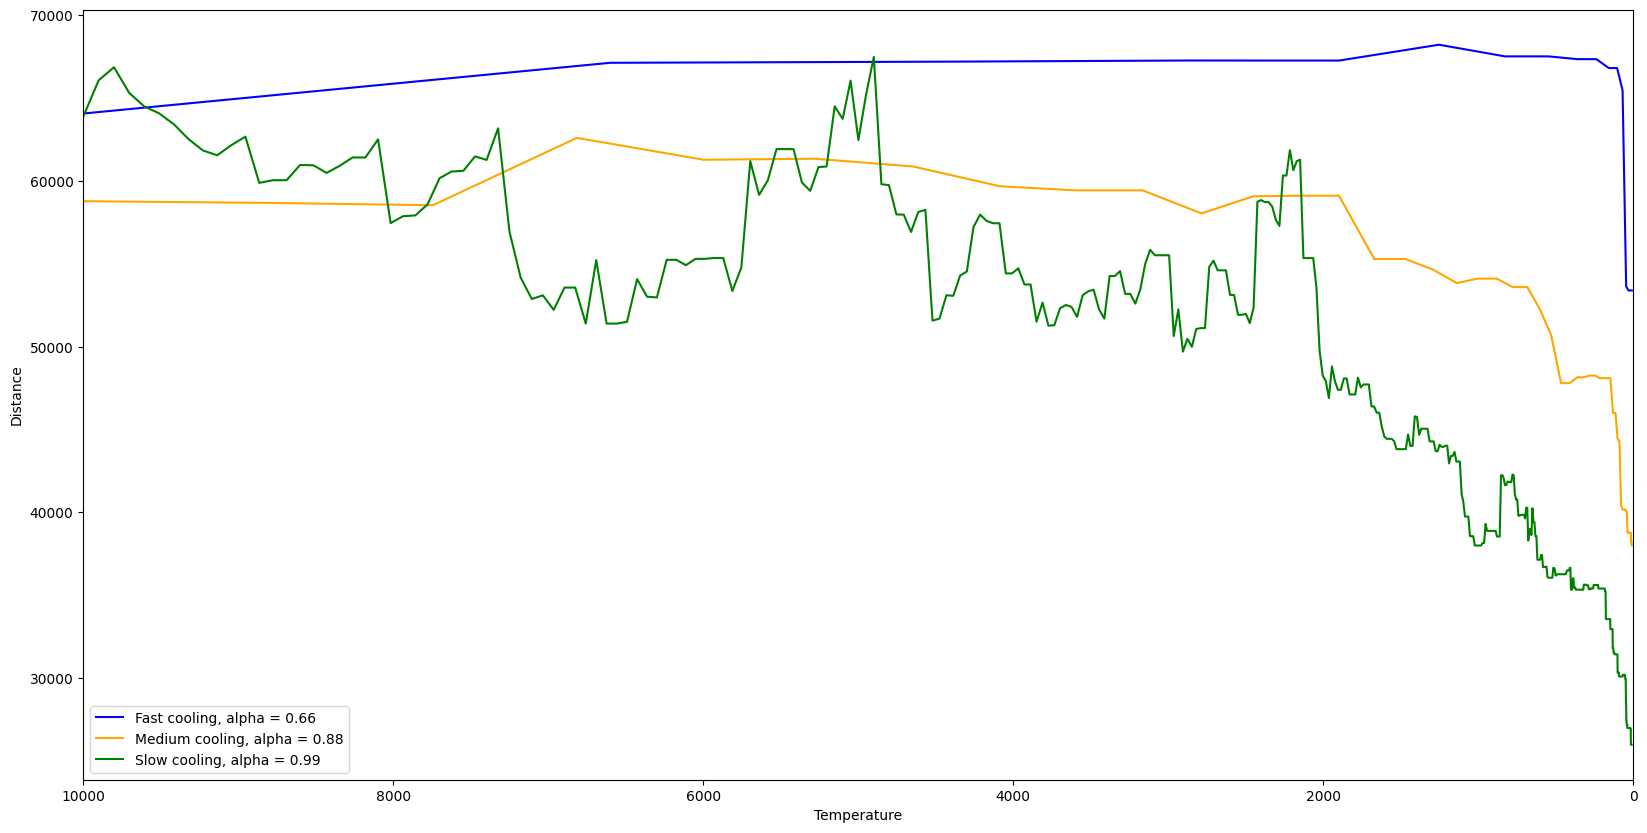

In [12]:
from matplotlib import pyplot as plt

# run simulated annealing for different cooling rates
paths_fast, temps_fast, dists_fast = sa(0.66)
paths_medium, temps_medium, dists_medium = sa(0.88)
paths_slow, temps_slow, dists_slow = sa(0.99)

# plot the difference
plt.figure(figsize=(20, 10))
plt.plot(temps_fast, dists_fast, color='blue', label='Fast cooling, alpha = 0.66')
plt.plot(temps_medium, dists_medium, color='orange', label='Medium cooling, alpha = 0.88')
plt.plot(temps_slow, dists_slow, color='green', label='Slow cooling, alpha = 0.99')
plt.xlim(10000, 0)
plt.xlabel('Temperature')
plt.ylabel('Distance')
plt.legend()
plt.show()


The graph shows the variation of the distance from the optimal solution over iterations at different cooling schedules with different cooling rates (alpha). The x-axis represents the iteration number, while the y-axis represents the distance from the optimal solution. The graph shows that the fast cooling schedule (alpha=0.66) converges the fastest, while the slow cooling schedule (alpha=0.99) converges the slowest. The medium cooling schedule (alpha=0.88) shows intermediate performance.

Therefore, we can conclude that the cooling rate affects the convergence rate of simulated annealing, with a higher cooling rate leading to faster convergence but a higher chance of getting stuck in a local minimum, while a lower cooling rate leads to slower convergence but a lower chance of getting stuck in a local minimum.

### 6. Produce a visualization of your optimization process


I produced a visualization of the Simulated Annealing solution and uploaded it to a certain location. Figure below showed the path plotted over the outline of the Russian Federation as background. I used the Mercator projection for the map visualization, projecting the latitude and longitude directly on the plotting canvas without any transformation.

In [13]:
!wget https://www.dropbox.com/s/sadvwkzbqjjurdv/russia.json?dl=1 -O russia.json

--2023-05-04 19:05:45--  https://www.dropbox.com/s/sadvwkzbqjjurdv/russia.json?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/sadvwkzbqjjurdv/russia.json [following]
--2023-05-04 19:05:45--  https://www.dropbox.com/s/dl/sadvwkzbqjjurdv/russia.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20cc97501bf59328182607a1c0.dl.dropboxusercontent.com/cd/0/get/B7b4LmTFdBMLFvaaIoWuiXoYa0JW3SX1jcVkPdIDS9pnm8IZuRJmU6kouEj09XZvMvQot-_8R6MZMqG_2GiCTVbtF0wQ0mEZPNk3hgfPwHHx2m5StKmg0XuVPq7eIiPHzSNh376xmAtIEn9OpfupTOPLvmrJDoWzX22kkejcgt9MpZ2fwGN1BD_M6_z192aNfb0/file?dl=1# [following]
--2023-05-04 19:05:45--  https://uc20cc97501bf59328182607a1c0.dl.dropboxusercontent.com/cd/0/get/B7b4LmTFdBMLFvaaIoWuiXoYa0JW3SX1jcVkPdIDS9pnm8IZuRJmU6kouEj0

In [14]:
import json

with open('russia.json') as f:
  russia_outline = json.loads(f.read())

# russia_outline

In [15]:
print(len(russia_outline[0]['geojson']['coordinates'][0][0]))

flattened_coordinates = [z for x in russia_outline[0]['geojson']['coordinates'] for y in x for z in y]

print(len(flattened_coordinates))

assert all(map(lambda x: len(x) == 2, flattened_coordinates))

22
104804


In [16]:
import matplotlib.pyplot as plt



def draw_russia_outline(ax):
  for polygon in russia_outline[0]['geojson']['coordinates']:
    closed_polygon = polygon[0] + polygon[0][:1]

    lat = [x[0] for x in closed_polygon]
    lon = [x[1] for x in closed_polygon]

    if lat[0] < 0:
      lat = [x + 360 for x in lat]

    ax.plot(lat, lon, color="black")


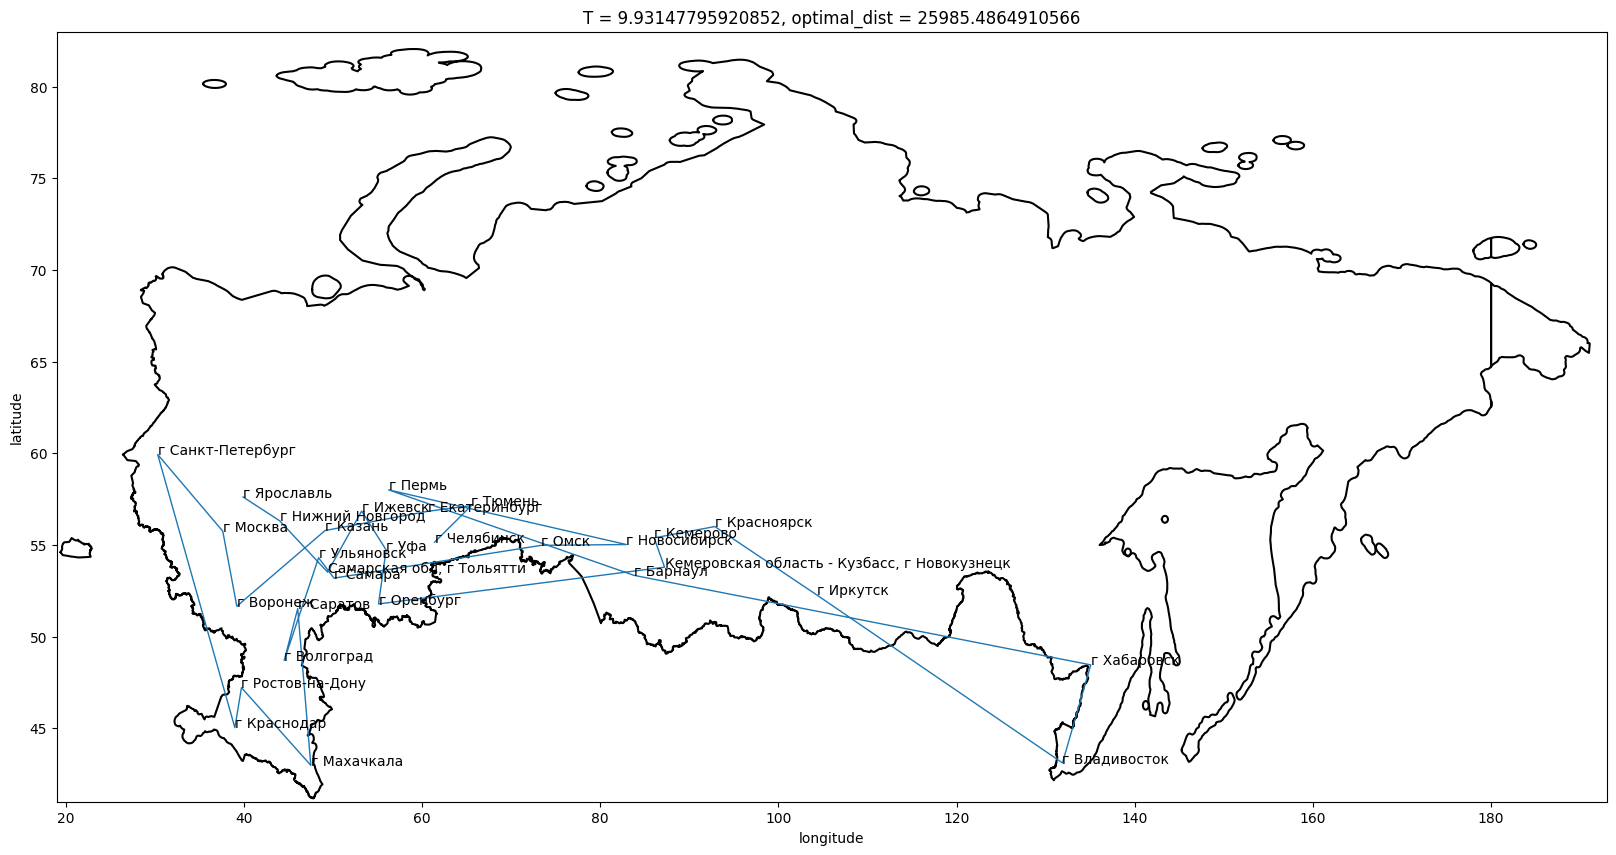

In [19]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
fig, ax = plt.subplots(figsize=(20, 10))

plt.ylabel('latitude')
plt.xlabel('longitude')

# define a function to draw the Russia outline
def draw_russia_outline(ax):
  for polygon in russia_outline[0]['geojson']['coordinates']:
    closed_polygon = polygon[0] + polygon[0][:1]
    lat = [x[0] for x in closed_polygon]
    lon = [x[1] for x in closed_polygon]
    if lat[0] < 0:
      lat = [x + 360 for x in lat]
    ax.plot(lat, lon, color="black")

# call the function to draw the Russia outline
draw_russia_outline(ax)

# define a line plot
ln, = plt.plot([], [], lw=1)

# initialize the plot
def init():
    ax.set_xlim(19, 193) # adjust the x limits to include all of Russia
    ax.set_ylim(41, 83) # adjust the y limits to include all of Russia
    ln.set_data([], [])
    return ln,

# update the plot for each frame
def update(i):
  xdata = []
  ydata = []
  path = paths_slow[i]
  for p in path:
    ydata.append(geo_coords[0][p])
    xdata.append(geo_coords[1][p])
  ax.title.set_text(f"T = {temps_slow[i]}, optimal_dist = {dists_slow[i]}")
  ln.set_data(xdata, ydata)
  return ln,

# create the animation
ani = FuncAnimation(fig, update, frames=len(paths_slow), init_func=init, blit=True)

# annotate the cities
for i, city in enumerate(cities):
  ax.annotate(city, (geo_coords[1][i], geo_coords[0][i]))

# save the animation as a video file
ani.save('anim.mp4', fps=30)

# show the plot
plt.show()


In [20]:
# ref: https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab
from IPython.display import HTML
from base64 import b64encode
mp4 = open('anim.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

###References:
1. https://vasishth.github.io/bayescogsci/book/sec-analytical.html#fig:postbeta-viz
2. https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/pages/readings/
3. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/
4. https://www.mathworks.com/help/stats/binocdf.html#:~:text=The%20binomial%20cumulative%20distribution%20function%20lets%20you%20obtain%20the%20probability,success%20on%20a%20single%20trial.
5. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
6. https://en.wikipedia.org/wiki/Posterior_predictive_distribution
7. https://en.wikipedia.org/wiki/Binomial_test
8. https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference
9. https://en.wikipedia.org/wiki/Binomial_distribution#:~:text=1)%2Fm.-,Conditional%20binomials,to%20another%20basket%20UY.
